## ISLP Chapter 5 - Resampling

### Applied exercise 5

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [2]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load Default dataset
# url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/Default.csv"
url = "../../Data/Default.csv"
Default = pd.read_csv(url, index_col = 'Unnamed: 0')

In [4]:
Default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [5]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [6]:
dfX = Default[['student', 'balance','income']]
dfX = pd.get_dummies(data = dfX, drop_first=True)
dfy = Default['default']

In [7]:
dfX.head()

,balance,income,student_Yes
1,729.526495,44361.625074,0
2,817.180407,12106.134700,1
3,1073.549164,31767.138947,0
4,529.250605,35704.493935,0
5,785.655883,38463.495879,0


In [8]:
dfy.head()

1    No
2    No
3    No
4    No
5    No
Name: default, dtype: object

### 5.a. Fitting a logistic regression model

In [336]:
from sklearn.linear_model import LogisticRegression

In [337]:
X = dfX[['income', 'balance']]
y = dfy

In [338]:
glmfit = LogisticRegression(solver = 'liblinear').fit(X, y)

In [339]:
glmfit.coef_

array([[-0.00012588,  0.00040756]])

### 5.b. Validation set approach

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = dfX[['income', 'balance']]
y = dfy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)

X_train,  (7000, 2) y_train,  (7000,) X_test:  (3000, 2) y_test:  (3000,)


In [14]:
from sklearn.linear_model import LogisticRegression

glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [15]:
glmpred = glmfit.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
conf_mat = confusion_matrix(y_test, glmpred)
conf_mat

array([[2905,    1],
       [  94,    0]])

In [18]:
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)

0.0136

### 5.c. Same process repeated thrice with different splits**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)
glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
glmpred = glmfit.predict(X_test)
conf_mat = confusion_matrix(y_test, glmpred)
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)

X_train,  (7500, 2) y_train,  (7500,) X_test:  (2500, 2) y_test:  (2500,)


0.0108

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)
glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
glmpred = glmfit.predict(X_test)
conf_mat = confusion_matrix(y_test, glmpred)
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)

X_train,  (5000, 2) y_train,  (5000,) X_test:  (5000, 2) y_test:  (5000,)


0.0322

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)
glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
glmpred = glmfit.predict(X_test)
conf_mat = confusion_matrix(y_test, glmpred)
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)

X_train,  (2500, 2) y_train,  (2500,) X_test:  (7500, 2) y_test:  (7500,)


0.0992

#### Checking for multiple splits

In [22]:
sample = np.linspace(start = 0.05, stop = 0.95, num = 20)

In [23]:
sample

array([0.05      , 0.09736842, 0.14473684, 0.19210526, 0.23947368,
       0.28684211, 0.33421053, 0.38157895, 0.42894737, 0.47631579,
       0.52368421, 0.57105263, 0.61842105, 0.66578947, 0.71315789,
       0.76052632, 0.80789474, 0.85526316, 0.90263158, 0.95      ])

In [24]:
X = dfX[['income', 'balance']]
y = dfy
confpd = pd.DataFrame()
for i in sample:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)
    glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    glmpred = glmfit.predict(X_test)
    conf_mat = confusion_matrix(y_test, glmpred)
    sum = round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)
    confpd = confpd.append([sum])

X_train,  (9500, 2) y_train,  (9500,) X_test:  (500, 2) y_test:  (500,)
X_train,  (9026, 2) y_train,  (9026,) X_test:  (974, 2) y_test:  (974,)
X_train,  (8552, 2) y_train,  (8552,) X_test:  (1448, 2) y_test:  (1448,)
X_train,  (8078, 2) y_train,  (8078,) X_test:  (1922, 2) y_test:  (1922,)
X_train,  (7605, 2) y_train,  (7605,) X_test:  (2395, 2) y_test:  (2395,)
X_train,  (7131, 2) y_train,  (7131,) X_test:  (2869, 2) y_test:  (2869,)
X_train,  (6657, 2) y_train,  (6657,) X_test:  (3343, 2) y_test:  (3343,)
X_train,  (6184, 2) y_train,  (6184,) X_test:  (3816, 2) y_test:  (3816,)
X_train,  (5710, 2) y_train,  (5710,) X_test:  (4290, 2) y_test:  (4290,)
X_train,  (5236, 2) y_train,  (5236,) X_test:  (4764, 2) y_test:  (4764,)
X_train,  (4763, 2) y_train,  (4763,) X_test:  (5237, 2) y_test:  (5237,)
X_train,  (4289, 2) y_train,  (4289,) X_test:  (5711, 2) y_test:  (5711,)
X_train,  (3815, 2) y_train,  (3815,) X_test:  (6185, 2) y_test:  (6185,)
X_train,  (3342, 2) y_train,  (3342,) X_te

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders

X_train,  (2868, 2) y_train,  (2868,) X_test:  (7132, 2) y_test:  (7132,)
X_train,  (2394, 2) y_train,  (2394,) X_test:  (7606, 2) y_test:  (7606,)
X_train,  (1921, 2) y_train,  (1921,) X_test:  (8079, 2) y_test:  (8079,)
X_train,  (1447, 2) y_train,  (1447,) X_test:  (8553, 2) y_test:  (8553,)
X_train,  (973, 2) y_train,  (973,) X_test:  (9027, 2) y_test:  (9027,)
X_train,  (500, 2) y_train,  (500,) X_test:  (9500, 2) y_test:  (9500,)


/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/934830016.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders

In [25]:
confpd.reset_index(drop=True, inplace=True)

In [26]:
confpd.columns = ['Error']

In [27]:
confpd.head()

,Error
0,0.0022
1,0.0044
2,0.0067
3,0.0084
4,0.0104


In [28]:
confpd.mean()

Error    0.090905
dtype: float64

Text(0.5, 0, 'split%')

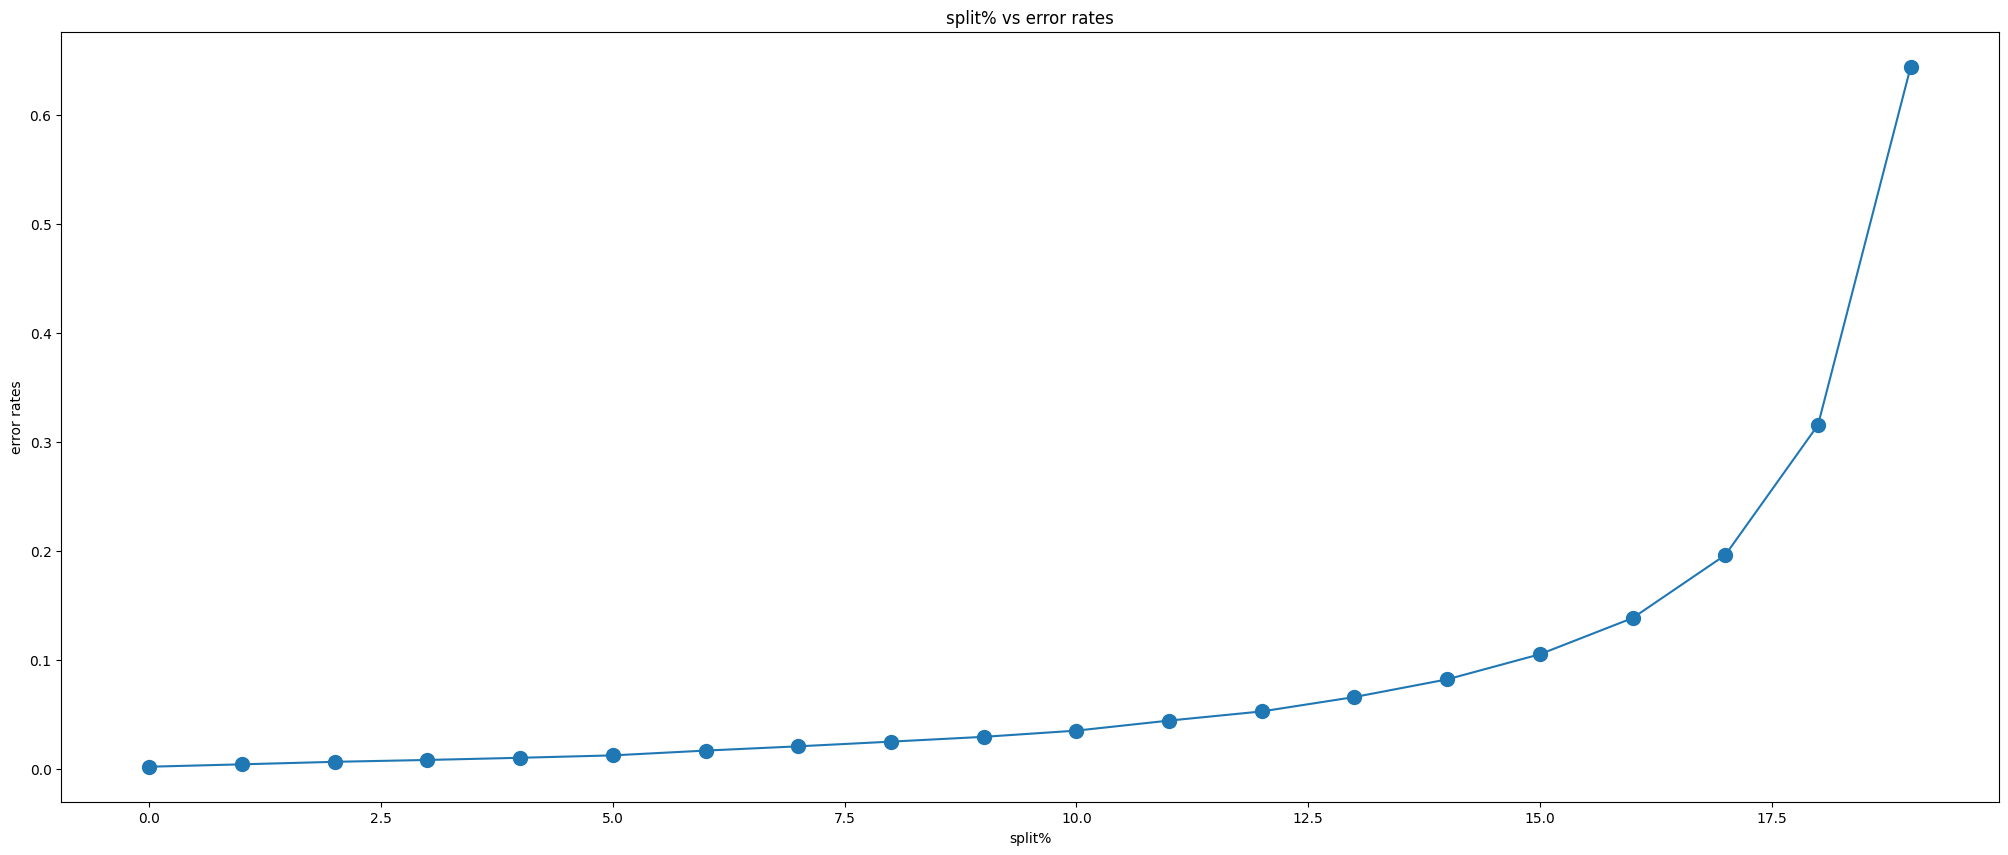

In [29]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(confpd, marker = 'o', markersize = 10)
plt.title("split% vs error rates")
plt.ylabel("error rates")
plt.xlabel("split%")

**We notice that the error rate asymptotically settle around ~0.62, but the growth really begins to plateau around 0.2.**

### 5.d. Fitting a logistic regression using income, balance and a dummy variable for student

In [30]:
X = dfX # no need to change since dfX already incorporates the dummy variable transformation for 'student'
y = dfy

#### Using the validation set approach

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [33]:
glmpred = glmfit.predict(X_test)

In [34]:
confusion_matrix(y_test, glmpred)

array([[2905,    1],
       [  94,    0]])

In [35]:
round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)

0.046

#### Checking for multiple splits

In [36]:
sample = np.linspace(start = 0.05, stop = 0.95, num = 20)
sample

array([0.05      , 0.09736842, 0.14473684, 0.19210526, 0.23947368,
       0.28684211, 0.33421053, 0.38157895, 0.42894737, 0.47631579,
       0.52368421, 0.57105263, 0.61842105, 0.66578947, 0.71315789,
       0.76052632, 0.80789474, 0.85526316, 0.90263158, 0.95      ])

In [37]:
X = dfX
y = dfy
confpd = pd.DataFrame()
for i in sample:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    print("X_train, ", X_train.shape, "y_train, ", y_train.shape, "X_test: ", X_test.shape, "y_test: ", y_test.shape)
    glmfit = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    glmpred = glmfit.predict(X_test)
    conf_mat = confusion_matrix(y_test, glmpred)
    sum = round((conf_mat[0][1] + conf_mat[1][0]) / y_train.shape[0], 4)
    confpd = confpd.append([sum])

X_train,  (9500, 3) y_train,  (9500,) X_test:  (500, 3) y_test:  (500,)
X_train,  (9026, 3) y_train,  (9026,) X_test:  (974, 3) y_test:  (974,)
X_train,  (8552, 3) y_train,  (8552,) X_test:  (1448, 3) y_test:  (1448,)
X_train,  (8078, 3) y_train,  (8078,) X_test:  (1922, 3) y_test:  (1922,)
X_train,  (7605, 3) y_train,  (7605,) X_test:  (2395, 3) y_test:  (2395,)
X_train,  (7131, 3) y_train,  (7131,) X_test:  (2869, 3) y_test:  (2869,)
X_train,  (6657, 3) y_train,  (6657,) X_test:  (3343, 3) y_test:  (3343,)
X_train,  (6184, 3) y_train,  (6184,) X_test:  (3816, 3) y_test:  (3816,)
X_train,  (5710, 3) y_train,  (5710,) X_test:  (4290, 3) y_test:  (4290,)
X_train,  (5236, 3) y_train,  (5236,) X_test:  (4764, 3) y_test:  (4764,)
X_train,  (4763, 3) y_train,  (4763,) X_test:  (5237, 3) y_test:  (5237,)
X_train,  (4289, 3) y_train,  (4289,) X_test:  (5711, 3) y_test:  (5711,)
X_train,  (3815, 3) y_train,  (3815,) X_test:  (6185, 3) y_test:  (6185,)
X_train,  (3342, 3) y_train,  (3342,) X_te

/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/fol

X_train,  (2868, 3) y_train,  (2868,) X_test:  (7132, 3) y_test:  (7132,)
X_train,  (2394, 3) y_train,  (2394,) X_test:  (7606, 3) y_test:  (7606,)
X_train,  (1921, 3) y_train,  (1921,) X_test:  (8079, 3) y_test:  (8079,)
X_train,  (1447, 3) y_train,  (1447,) X_test:  (8553, 3) y_test:  (8553,)
X_train,  (973, 3) y_train,  (973,) X_test:  (9027, 3) y_test:  (9027,)
X_train,  (500, 3) y_train,  (500,) X_test:  (9500, 3) y_test:  (9500,)


/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/folders/_c/g4nn9vsd285_gcjw3nh8c8kr0000gn/T/ipykernel_51156/1052828872.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  confpd = confpd.append([sum])
/var/fol

In [38]:
confpd.reset_index(drop=True, inplace=True)
confpd.columns = ['Error']
confpd.head()

,Error
0,0.0022
1,0.0044
2,0.0067
3,0.0084
4,0.0104


In [39]:
confpd.mean()

Error    0.090905
dtype: float64

Text(0.5, 0, 'split%')

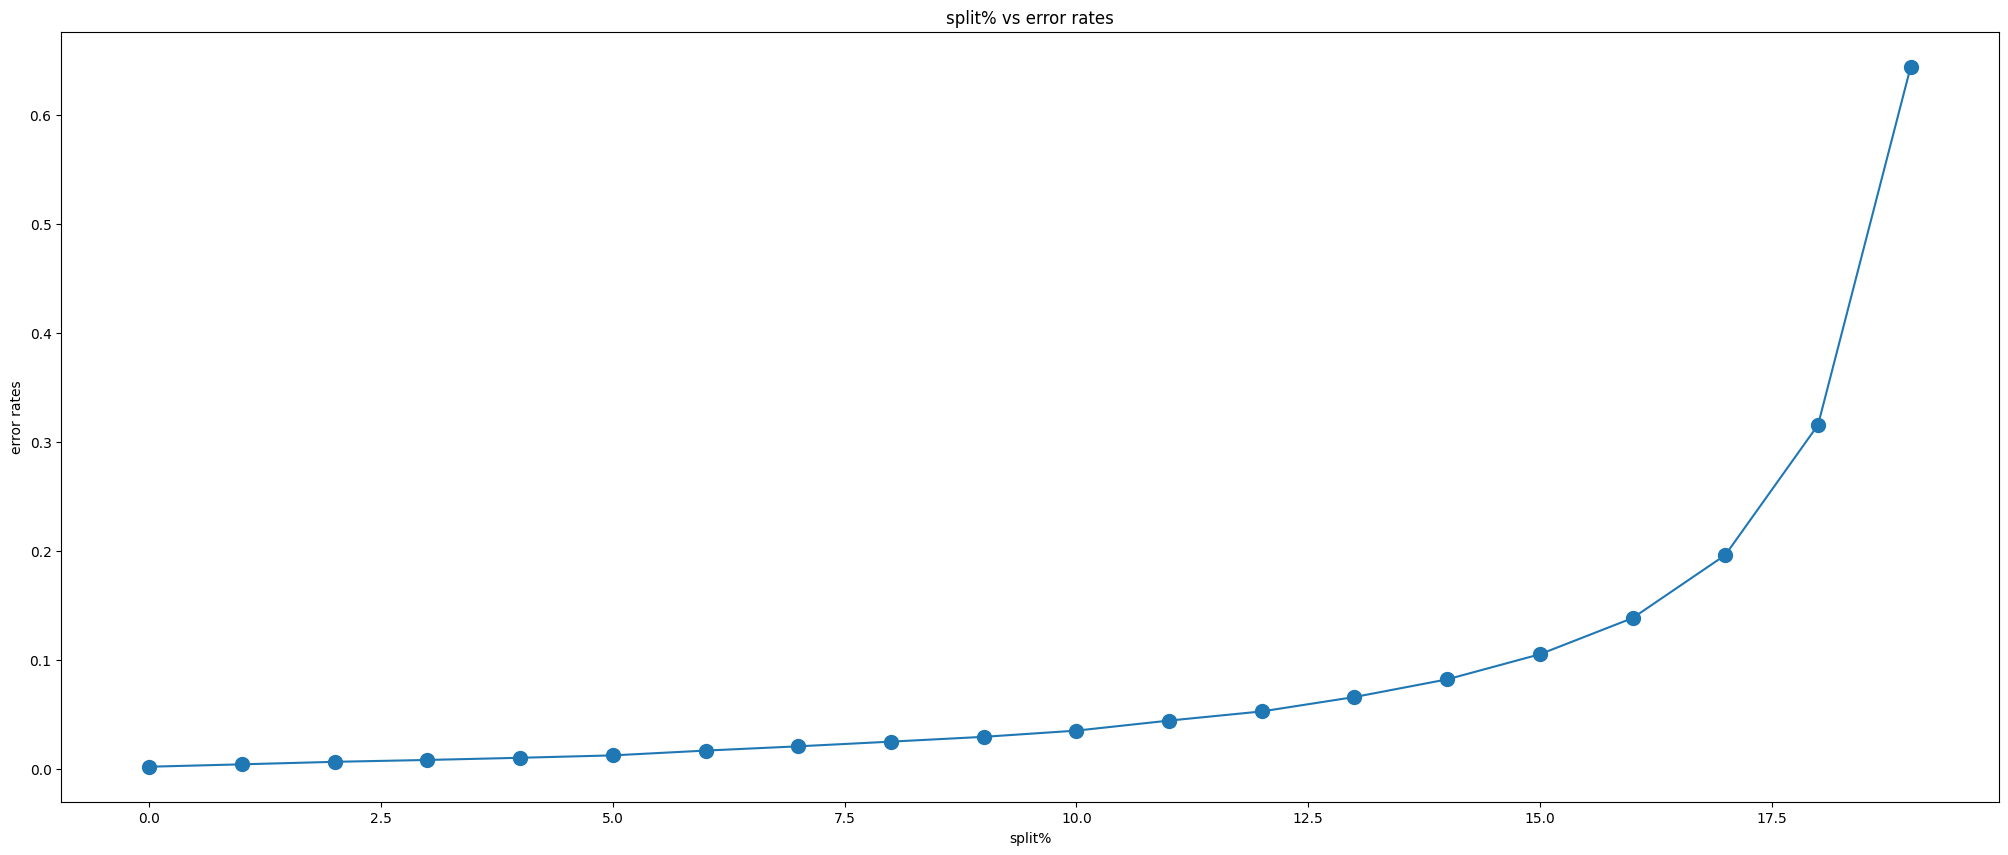

In [40]:
# plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(confpd, marker = 'o', markersize = 10)
plt.title("split% vs error rates")
plt.ylabel("error rates")
plt.xlabel("split%")

**We notice the same graph as that for logit without the dummy variable. So, we can conclude that the dummy variable
does not lead to a reduction in the test error rate**